In [1]:
import os
import numpy as np
import librosa
import pandas as pd
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

In [2]:
label_path = '/Users/korakoppanaveen/Documents/Study/MSc Project/EMOPIA_2.2/label.csv'
labels = pd.read_csv(label_path)

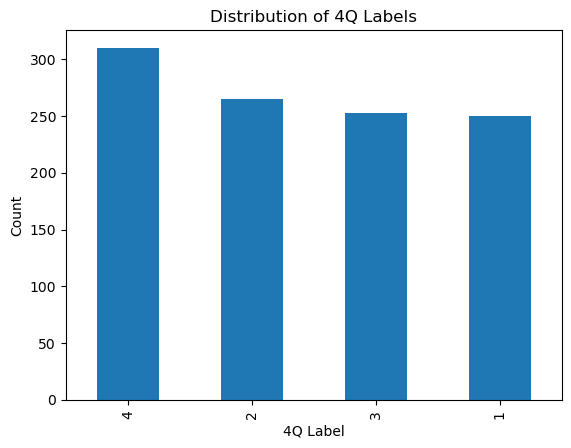

In [3]:
import matplotlib.pyplot as plt
labels['4Q'].value_counts().plot(kind='bar')
plt.xlabel('4Q Label')
plt.ylabel('Count')
plt.title('Distribution of 4Q Labels')
plt.show()

In [7]:
# Define the directory where the EMOPIA dataset is stored
dataset_directory = '/Users/korakoppanaveen/Documents/Study/MSc Project/EMOPIA_2.2/audios/'
seg_directory = os.path.join(dataset_directory, 'seg')

In [5]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=30)  # Load audio file

    features = {}
    features['filename'] = os.path.basename(file_path)
    features['tempo'] = librosa.beat.tempo(y=y, sr=sr)[0]
    features['rms'] = np.mean(librosa.feature.rms(y=y).T, axis=0)
    features['chromagram'] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    features['mel_spectrogram'] = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    features['spectral_centroid'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
    features['spectral_contrast'] = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)
    features['spectral_rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis=0)
    features['zero_crossing_rate'] = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    features['harmonics'] = np.mean(librosa.effects.harmonic(y).T, axis=0)
    features['mfccs'] = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)

    return features


def process_dataset(seg_directory):
    data = []
    labels = []
    file_list = [f for f in os.listdir(seg_directory) if f.endswith('.mp3')]
    
    for filename in tqdm(file_list, desc="Processing audio files"):
        # Extract label from the filename (e.g., Q1, Q2, Q3, Q4)
        label = filename.split('_')[0]
        file_path = os.path.join(seg_directory, filename)
        
        # Extract features from the audio file
        features_dict = extract_features(file_path)
        
        # Append features and label to lists
        data.append(features_dict)
        labels.append(label)
    
    return data, labels


In [8]:
all_features, labels = process_dataset(seg_directory)

Processing audio files: 100%|█████████████████| 845/845 [23:53<00:00,  1.70s/it]


In [48]:
features_df = pd.DataFrame(all_features)
features_df.to_csv('/Users/korakoppanaveen/Documents/Study/MSc Project/EMOPIA_2.2/audio_features.csv', index=False)

In [120]:
features_df['mfccs'][0]

array([-4.0569916e+02,  1.9302412e+02,  8.4447678e+01,  2.6464853e+01,
        1.4105848e+01,  6.9706802e+00, -3.1126353e-01, -1.0719736e+00,
       -1.5406362e+00, -4.3880396e+00, -5.0613389e+00, -3.9120142e+00,
       -3.9549670e+00], dtype=float32)

In [29]:
features_means = {
    'tempo': {
        'mean': features_df['tempo'].mean(),
        'count': features_df['tempo'].count(),
        'min': features_df['tempo'].min(),
        'max': features_df['tempo'].max(),
        'mode': features_df['tempo'].mode(),
    },
    'rms': {
        'mean': features_df['rms'].mean(),
        'count': features_df['rms'].count(),
        'min': features_df['rms'].min(),
        'max': features_df['rms'].max(),
        'mode': features_df['rms'].mode(),
    },
    'chromagram': {
        'mean': features_df['chromagram'].mean(),
        'count': features_df['chromagram'].count(),
        # 'min': features_df['chromagram'].min(),
        # 'max': features_df['chromagram'].max(),
        # 'mode': features_df['chromagram'].mode(),
    },
    'mel_spectrogram': {
        'mean': features_df['mel_spectrogram'].mean(),
        'count': features_df['mel_spectrogram'].count(),
        # 'min': features_df['mel_spectrogram'].min(),
        # 'max': features_df['mel_spectrogram'].max(),
        # 'mode': features_df['mel_spectrogram'].mode(),
    },
    'spectral_centroid': {
        'mean': features_df['spectral_centroid'].mean(),
        'count': features_df['spectral_centroid'].count(),
        'min': features_df['spectral_centroid'].min(),
        'max': features_df['spectral_centroid'].max(),
        # 'mode': features_df['spectral_centroid'].mode(),
    },
    'spectral_contrast': {
        'mean': features_df['spectral_contrast'].mean(),
        'count': features_df['spectral_contrast'].count(),
        # 'min': features_df['spectral_contrast'].min(),
        # 'max': features_df['spectral_contrast'].max(),
        # 'mode': features_df['spectral_contrast'].mode(),
    },
    'spectral_rolloff': {
        'mean': features_df['spectral_rolloff'].mean(),
        'count': features_df['spectral_rolloff'].count(),
        'min': features_df['spectral_rolloff'].min(),
        'max': features_df['spectral_rolloff'].max(),
        # 'mode': features_df['spectral_rolloff'].mode(),
    },
    'zero_crossing_rate': {
        'mean': features_df['zero_crossing_rate'].mean(),
        'count': features_df['zero_crossing_rate'].count(),
        'min': features_df['zero_crossing_rate'].min(),
        'max': features_df['zero_crossing_rate'].max(),
        # 'mode': features_df['zero_crossing_rate'].mode(),
    },
    'harmonics': {
        'mean': features_df['harmonics'].mean(),
        'count': features_df['harmonics'].count(),
        'min': features_df['harmonics'].min(),
        'max': features_df['harmonics'].max(),
        # 'mode': features_df['harmonics'].mode(),
    },
    'mfccs': {
        'mean': features_df['mfccs'].mean(),
        'count': features_df['mfccs'].count(),
        # 'min': features_df['mfccs'].min(),
        # 'max': features_df['mfccs'].max(),
        # 'mode': features_df['mfccs'].mode(),
    },
}

In [39]:
features_means

{'tempo': {'mean': 122.21670896094375,
  'count': 845,
  'min': 61.5234375,
  'max': 184.5703125,
  'mode': 0    129.199219
  Name: tempo, dtype: float64},
 'rms': {'mean': array([0.08359532], dtype=float32),
  'count': 845,
  'min': array([0.00423881], dtype=float32),
  'max': array([0.2587684], dtype=float32),
  'mode': 0       [0.004238811]
  1      [0.0076013217]
  2      [0.0076314732]
  3       [0.008252185]
  4        [0.01031621]
              ...      
  840      [0.19871767]
  841      [0.20051546]
  842       [0.2079562]
  843      [0.24550241]
  844       [0.2587684]
  Name: rms, Length: 845, dtype: object},
 'chromagram': {'mean': array([0.27680415, 0.24218802, 0.27232176, 0.23955248, 0.26576763,
         0.2584714 , 0.2378895 , 0.26724118, 0.24230435, 0.26984337,
         0.24970198, 0.2554347 ], dtype=float32),
  'count': 845},
 'mel_spectrogram': {'mean': array([4.23677444e-01, 2.41358232e+00, 1.24041548e+01, 1.60361290e+01,
         1.62064705e+01, 1.09714432e+01, 1.11

In [111]:
features_df['chromagram'][0]

array([0.08687853, 0.25835642, 0.4652982 , 0.25377092, 0.22853029,
       0.15421931, 0.35336483, 0.22354135, 0.19784196, 0.37909028,
       0.15982059, 0.11145227], dtype=float32)

/Users/korakoppanaveen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


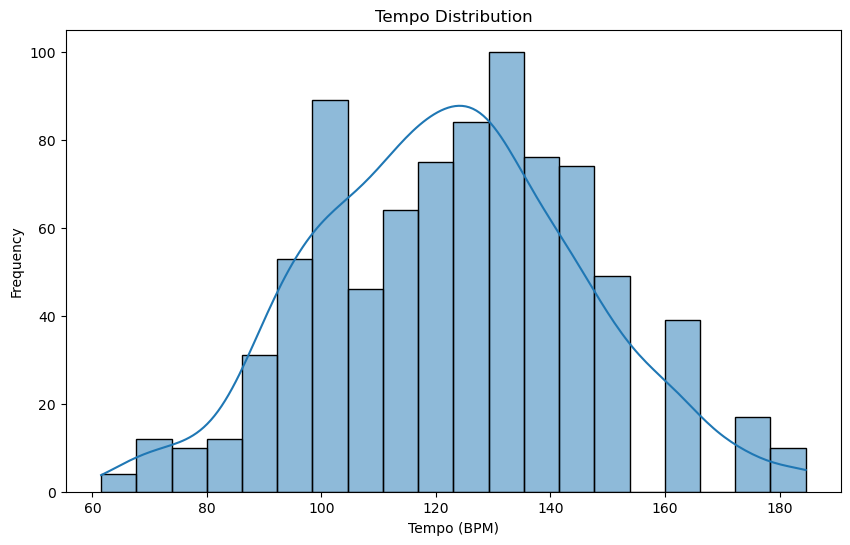

In [68]:
# Visualization 1: Tempo Distribution
plt.figure(figsize=(10, 6))
sns.histplot(features_df['tempo'], bins=20, kde=True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()

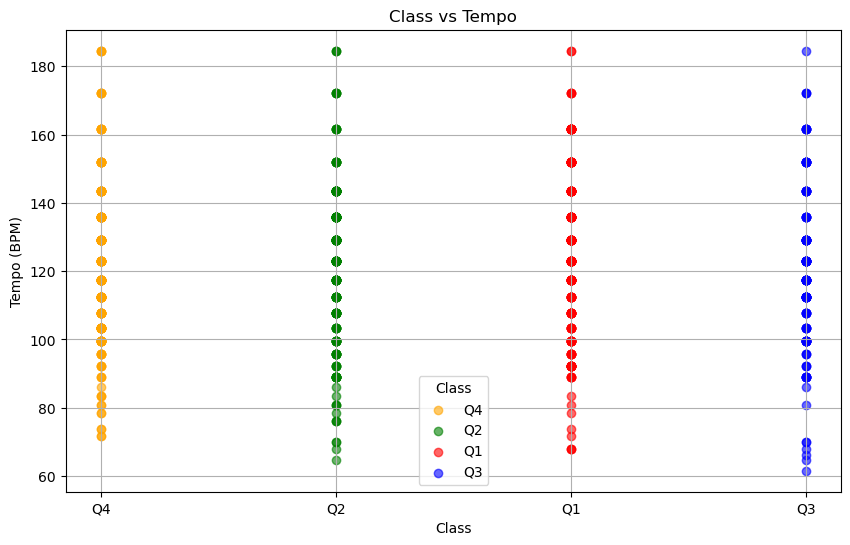

In [102]:
# Define colors for each class label
colors = {'Q1': 'red', 'Q2': 'green', 'Q3': 'blue', 'Q4': 'orange'}

# Plot class vs tempo
plt.figure(figsize=(10, 6))

for cls in features_df['label'].unique():
    class_data = features_df[features_df['label'] == cls]
    plt.scatter(class_data['label'], class_data['tempo'], c=colors[cls], label=cls, alpha=0.6)

plt.xlabel('Class')
plt.ylabel('Tempo (BPM)')
plt.title('Class vs Tempo')
plt.legend(title='Class')
plt.grid(True)
plt.show()

In [122]:
# Visualization 2: RMS Distribution (Box Plot)

rms_values_flat = [eval(i)[0] for i in features_df['rms']]
# Convert to a DataFrame for easier plotting
rms_df = pd.DataFrame(rms_values_flat, columns=['RMS'])

# Visualization 1: RMS Distribution (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=rms_df['RMS'])
plt.title('RMS Distribution')
plt.xlabel('RMS')
plt.show()

In [108]:
features_df['spectral_centroid'].values

0      [363.48891187382816]
1       [482.8205282765645]
2       [619.7695953297458]
3       [849.7258218037383]
4      [405.64366149092547]
               ...         
840     [937.4066971811028]
841     [657.1402158606126]
842     [702.8375158672668]
843     [1152.404440635311]
844     [588.1655099551211]
Name: spectral_centroid, Length: 845, dtype: object

In [123]:
# Visualization 3: Spectral Centroid Distribution (Box Plot)
spectral_centroid_values = np.array([float(x.strip('[]')) for x in features_df['spectral_centroid'].values])

spectral_centroid_df = pd.DataFrame(spectral_centroid_values, columns=['Spectral Centroid'])

# Visualization 1: Spectral Centroid Distribution (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=spectral_centroid_df['Spectral Centroid'])
plt.title('Spectral Centroid Distribution')
plt.xlabel('Spectral Centroid')
plt.show()

# Visualization 2: Spectral Centroid Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(spectral_centroid_df['Spectral Centroid'], bins=20, kde=True)
plt.title('Spectral Centroid Distribution')
plt.xlabel('Spectral Centroid')
plt.ylabel('Frequency')
plt.show()


In [124]:
# Convert string array to float array
mfccs_data = np.array([np.fromstring(x.strip('[]'), sep=' ') for x in features_df['mfccs']])

# Create a DataFrame for easier handling
df_mfccs = pd.DataFrame(mfccs_data)

# Visualization: MFCCs Heatmap for the sample data
plt.figure(figsize=(12, 8))
sns.heatmap(df_mfccs.T, cmap='viridis', cbar=True, xticklabels=False, yticklabels=True)
plt.title('MFCCs Heatmap for Sample Data')
plt.xlabel('Samples')
plt.ylabel('MFCC Coefficients')
plt.show()

In [125]:
X = features_df.drop(columns=['filename', 'label'])
y = features_df['label']

In [126]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [129]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

ValueError: setting an array element with a sequence.